In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from tqdm import tqdm


In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
def preproccessing_alpha(train, test):
    """
    подготоваливаем данные
    
    @return all_data
    """
    # выделяем цели в отдельный столбец
    y = train['TARGET']
    # отделяем TARGET от тренировачных данных
    train = train.drop('TARGET', axis=1)
    # соеденим train и test
    # чтобы индексация было с 0 - n-1 , игнорирую начальную.
    all_data = pd.concat([train, test], ignore_index=True)
    return all_data, y 

In [4]:
def split_dataframe(dataframe, index):
    """
    делим данные на тренировачные и тестовые по индексу
    
    @return data_train, data_test
    """
    # Вновь разделите на train и test (не мешая)
    # t_data.
    data_train = dataframe[:index]
    data_test = dataframe[index:]
    return data_train, data_test


In [5]:
def cal_predict(x_train, y_train, x_test, blackbox):
    """
    Строим модель прогнозирования на основе черного ящика
    
    @return predict, predict_proba 
    """
    model = blackbox # у квалификатора есть своё случайное значение.
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    predict_proba = model.predict_proba(x_test)
    return predict, predict_proba

In [6]:
a=[0,2,4]
b=[1,3,5]

for d in a,b:
    print(d)

[0, 2, 4]
[1, 3, 5]


In [7]:
def draw_hist(_y, result_predicts, xlim=(-1, 15), ylim=(-0.01, 1.01), size=(5,10)):
    steps = []
    scores = []
    for data in result_predicts:
        predict_prob, step = data
        score = roc_auc_score(_y, predict_prob[:,1])
        steps.append(step)
        scores.append(score)
    
    plt.figure(figsize=size)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("steps")
    plt.ylabel("ROC_AUC")
    plt.bar(steps, scores)
    

In [8]:
def draw_roc_auc_multy(y_test, result_predicts):
    plt.figure(figsize=(5, 10))
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))
    for data in result_predicts:
        predict_prob, depth = data
        score = roc_auc_score(y_test, predict_prob[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:,1])
        plt.plot(fpr, tpr, label=f'ROC {score:.3f} {depth}')
    plt.legend( borderaxespad=0.)

In [9]:
def draw_roc_auc(y_test, predict_prob, tittle=""):
    """
    Считаем и рисуем  roc_auc метрику.
    """
    #TODO что мы считаем в roc_auc_score
    score = roc_auc_score(y_test, predict_prob[:,1])
    #
    fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:,1])
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.title(f'ROC curve {tittle} {score:.3f}')
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))

## ГОТОВИМ ДАННЫЕ

In [10]:
train = pd.read_csv('./data/03_santander_train.csv', index_col='ID')

In [11]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
test = pd.read_csv('./data/03_santander_test.csv', index_col='ID')

In [13]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [14]:
all_data, y = preproccessing_alpha(train, test)
# данные в полном порядке, все вещественные. Пропусков нет.
all_data.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Data columns (total 369 columns):
var3                             151838 non-null int64
var15                            151838 non-null int64
imp_ent_var16_ult1               151838 non-null float64
imp_op_var39_comer_ult1          151838 non-null float64
imp_op_var39_comer_ult3          151838 non-null float64
imp_op_var40_comer_ult1          151838 non-null float64
imp_op_var40_comer_ult3          151838 non-null float64
imp_op_var40_efect_ult1          151838 non-null float64
imp_op_var40_efect_ult3          151838 non-null float64
imp_op_var40_ult1                151838 non-null float64
imp_op_var41_comer_ult1          151838 non-null float64
imp_op_var41_comer_ult3          151838 non-null float64
imp_op_var41_efect_ult1          151838 non-null float64
imp_op_var41_efect_ult3          151838 non-null float64
imp_op_var41_ult1                151838 non-null float64
imp_op_var39_efect_ult1          1518

In [15]:
data_train, data_test = split_dataframe(all_data, y.shape[0])

In [16]:
# Делаем hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.33, random_state=42)

# sklearn.tree.DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
predict_probs=[]
for depth in tqdm(range(1,15,2)):
    blackbox = DecisionTreeClassifier(max_depth=depth, random_state=42)
    predict, predict_prob = cal_predict(
        x_train=X_train,
        x_test=X_test,
        y_train=y_train,
        blackbox=blackbox
    )
    predict_probs.append(( predict_prob, depth)) 

100%|██████████| 7/7 [00:21<00:00,  3.01s/it]


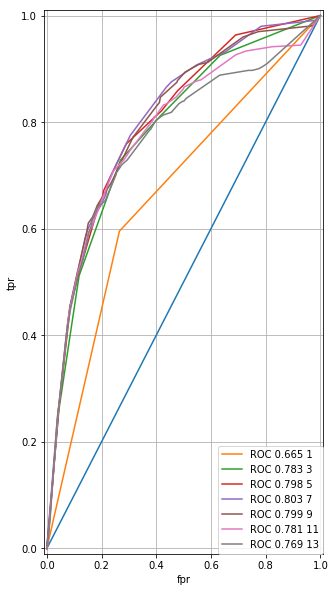

In [20]:
draw_roc_auc_multy(y_test, predict_probs)

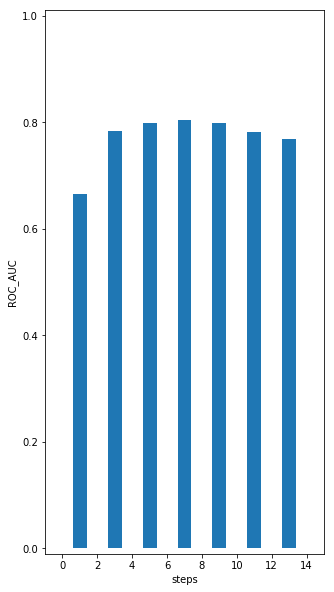

In [21]:
draw_hist(y_test, predict_probs)

# sklearn.neighbors.KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
y_test.shape

(25087,)

In [24]:
predict_probs=[]
for neighbors in tqdm(range(1,15,3)):
    blackbox = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=4)
    predict, predict_prob = cal_predict(
        x_train=X_train.iloc[:10000,:100],
        x_test=X_test.iloc[:10000,:100],
        y_train=y_train.iloc[:10000],
        blackbox=blackbox
    )
    predict_probs.append(( predict_prob, neighbors)) 

100%|██████████| 5/5 [02:20<00:00, 28.09s/it]


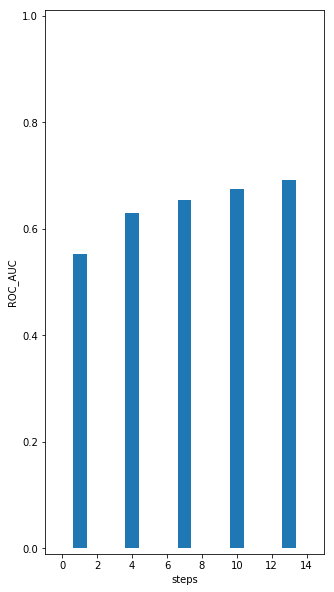

In [25]:
draw_hist(y_test.iloc[:10000], predict_probs)

# sklearn.linear_model.LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
predict_probs=[]
for value in tqdm(range(1,50,2)):
    blackbox = LogisticRegression(penalty='l2', C=value)
    predict, predict_prob = cal_predict(
        x_train=X_train,
        x_test=X_test,
        y_train=y_train,
        blackbox=blackbox
    )
    predict_probs.append(( predict_prob, value)) 

100%|██████████| 25/25 [02:18<00:00,  5.54s/it]


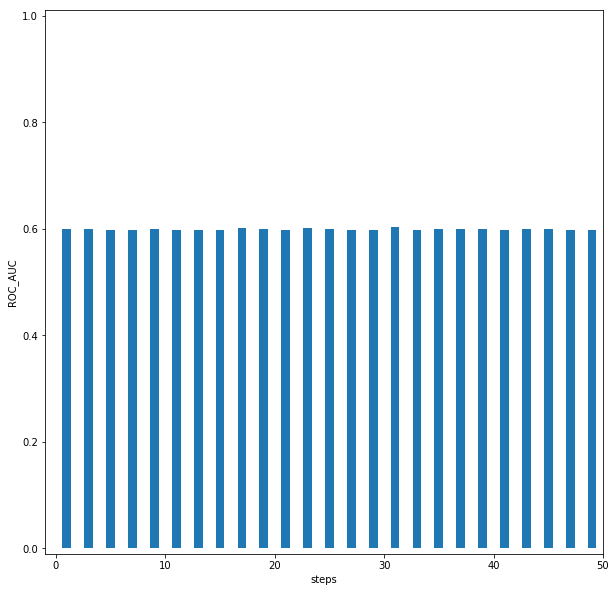

In [28]:
draw_hist(y_test, predict_probs, xlim=(-1,50), size=(10,10))

In [31]:
predict_probs=[]
for value in tqdm(range(1,20,2)):
    blackbox = LogisticRegression(penalty='l1', C=value, n_jobs=4)
    predict, predict_prob = cal_predict(
        x_train=X_train,
        x_test=X_test,
        y_train=y_train,
        blackbox=blackbox
    )
    predict_probs.append(( predict_prob, value)) 

  0%|          | 0/10 [00:00<?, ?it/s]/home/ssmarkin/zwork/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))
/home/ssmarkin/zwork/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
100%|██████████| 10/10 [2:11:20<00:00, 788.03s/it] 


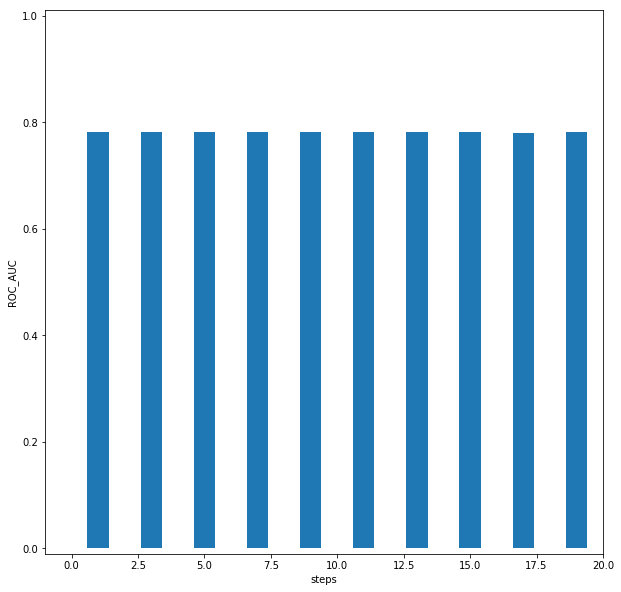

In [35]:
draw_hist(y_test, predict_probs, xlim=(-1,20), size=(10,10))

https://www.kaggle.com/cast42/exploring-features